Exploratory Data Analysis on the Titanic Dataset

- The aim of this EDA is to gather insights from the titanic dataset and eventually predict whether a person would have survived or not.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train=pd.read_csv("../dataset/titanic_train_data.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- The dataset has both numerical and categorical data

In [27]:
train=train.set_index('PassengerId')

In [28]:
train.shape

(891, 11)

-It has 891 rows and 11 columns

In [29]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Here sbsp - number of sibilings or spouse
parch - number of parents or children
embarked- post where a passenger boarded a ship

In [30]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

-There are missing values in the age and cabin columns. 

In [34]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [35]:
train['Age'].isnull().sum()

0

-We thus fill the missing values of Age by the mean age value

In [36]:
(train['Fare']==0).sum()

15

- we observe that the fare amount is 0 for 15 rows which is probably represents fare of cabin crew/staff etc

In [37]:
train['Fare']=train["Fare"].fillna(train["Fare"].mean())
train['Fare'].isnull().sum()

0

- We have thus altered the fare values with the mean fare value wherever the fare is 0 (15 rows)

In [39]:
(train['Cabin'].isnull().mean())*100

77.10437710437711

Since 77% of the cabin column has missing values we will drop it.

In [40]:
train=train.drop('Cabin',axis=1)

In [41]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


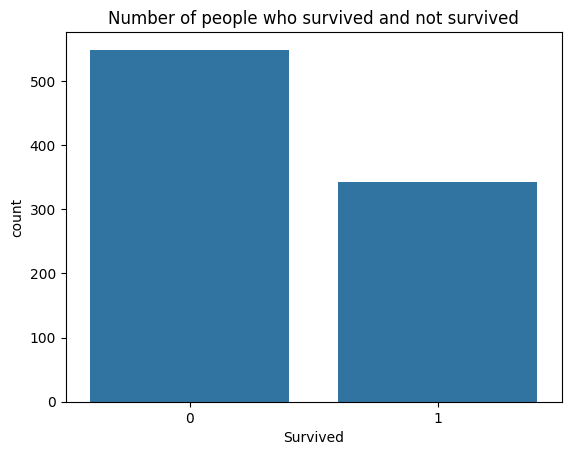

In [43]:
sns.countplot(data=train,x='Survived')
plt.title("Number of people who survived and not survived")
plt.show()

In [45]:
(train['Survived'].value_counts(normalize=True))*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

- So 61% of the passengers survied and 38% of them failed to survive

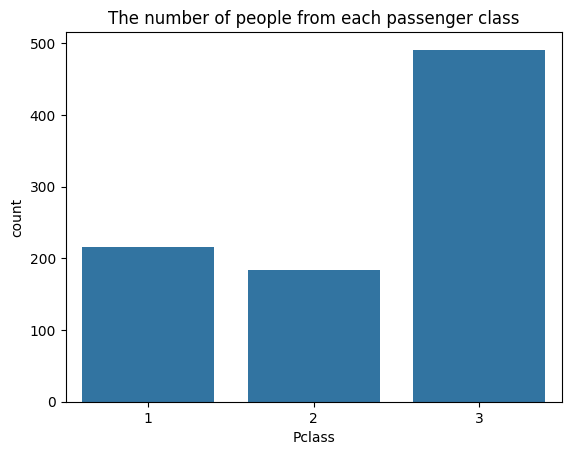

In [46]:
sns.countplot(x='Pclass',data=train)
plt.title("The number of people from each passenger class")
plt.show()

- Most of the customers belonged to passenger class 3

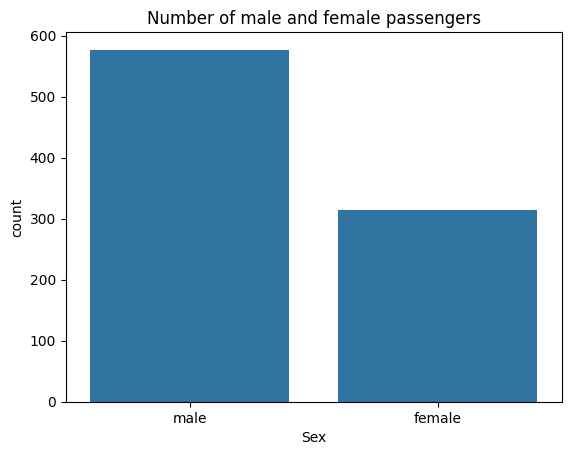

In [47]:
sns.countplot(x='Sex',data=train)
plt.title("Number of male and female passengers")
plt.show()

- There were more male passengers than female

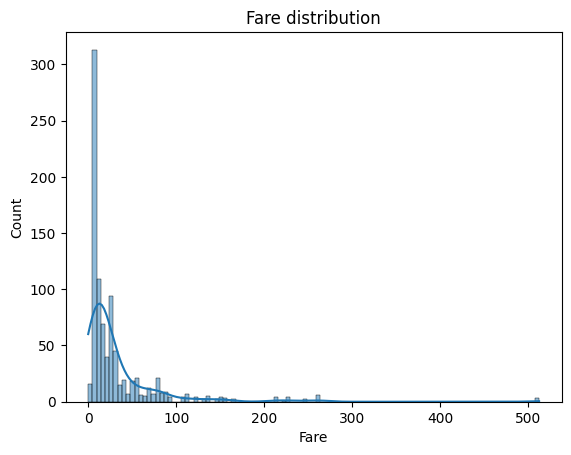

In [48]:
sns.histplot(train["Fare"],kde=True)
plt.title("Fare distribution")
plt.show()

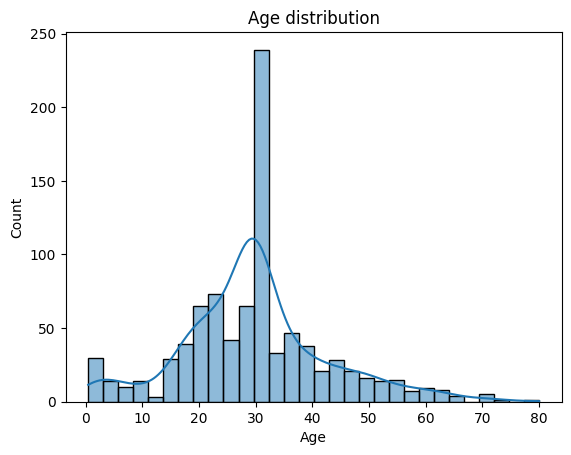

In [49]:
sns.histplot(train['Age'],kde=True)
plt.title("Age distribution")
plt.show()

- This shows that most of the passengers were beteween 20-40

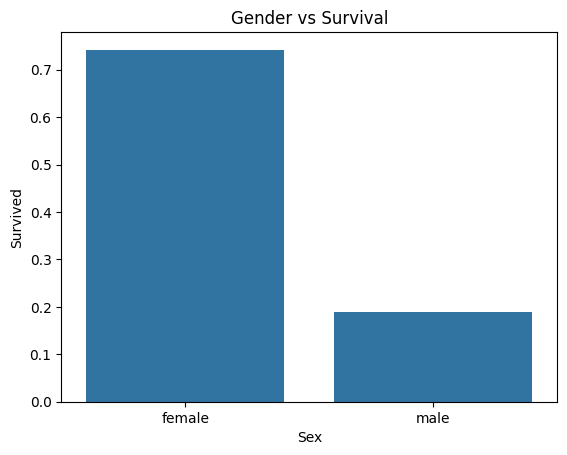

In [ ]:
gender_surv=train.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(data=gender_surv,x='Sex',y='Survived')
plt.title("Gender vs Survival")
plt.show()

- Male survival rate is around 20% and female survival rate is around 75%

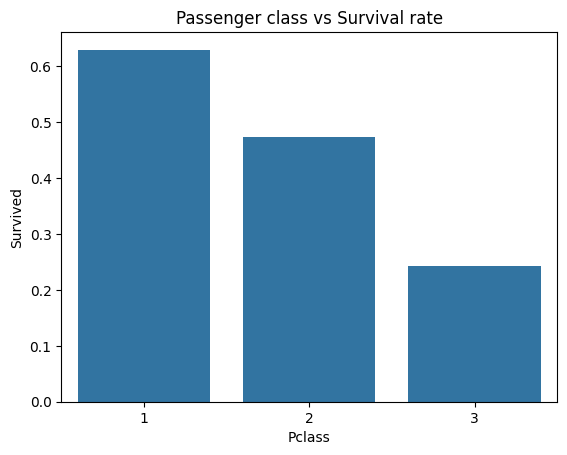

In [53]:
pclass_surv=train.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(data=pclass_surv,x="Pclass",y="Survived")
plt.title("Passenger class vs Survival rate")
plt.show()

Passengers in Pclass1 had 60% survival rate which is better than the survival rates of passengers in class 2 and 3
passengers in Pclass3 had the lowest survival rate of 22%

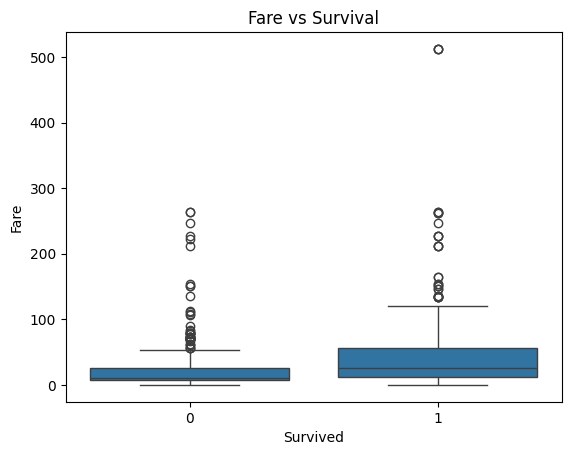

In [56]:
sns.boxplot(x='Survived',y='Fare',data=train)
plt.title("Fare vs Survival")
plt.show()

- Fare has less impact on the survival rate.
- Even though fare and pclass have a direct relationship, fare is a noisy variable that is less reliable as cabin crew might not have fares, the fare value might represent a group(shared tickets) and not the individual fare price

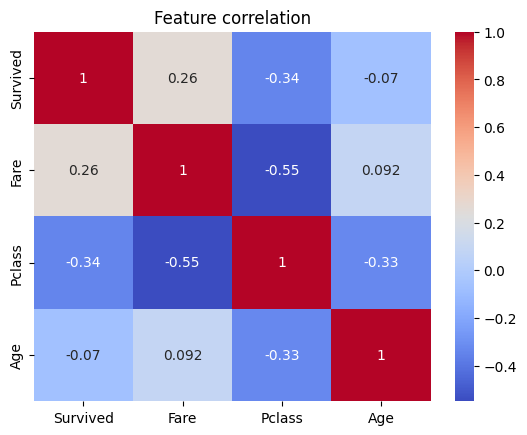

In [57]:
cols=['Survived','Fare','Pclass','Age']
sns.heatmap(train[cols].corr(),annot=True,cmap='coolwarm')
plt.title("Feature correlation")
plt.show()

- There is a negative correlation between Pclass and Survival indicating that a low numbers class has high survival rate
- There is a positive correlation between Fare and Survival indicating that a higher fare leads to better survival rate
- There is a negative correlation between Fare and Pclass
- There is a negative correlation between Age and Pclass showing that people in lower numbered classes were older